# **Women Cloth Prediction with Multi Nomial Naive Bayes**

## **Objective**
To predict the customer ratings of women clothing based on their reviews using Multinomial Naive Bayes.



## **Data Source**
The dataset is sourced from the YBI Foundation's Machine Learning Repository.

## **Import Library**

In [64]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

## **Import Dataset**

In [5]:
df = pd.read_csv('https://github.com/YBIFoundation/MachineLearning/raw/refs/heads/main/Dataset/Women%20Clothing%20E-Commerce%20Review.csv')

In [6]:
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## **Describe Data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [8]:
df.shape

(23486, 10)

**Missing values**

Remove missing values in Reviews columns with No Review text

In [9]:
df.isna().sum()

,0
Clothing ID,0
Age,0
Title,3810
Review,845
Rating,0
Recommended,0
Positive Feedback,0
Division,14
Department,14
Category,14


In [10]:
df[df['Review'] == ''] = np.NaN

In [11]:
df['Review'].fillna('No Review', inplace=True)

<ipython-input-11-6914f2e50d09>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review'].fillna('No Review', inplace=True)


In [12]:
df.isna().sum()

,0
Clothing ID,0
Age,0
Title,3810
Review,0
Rating,0
Recommended,0
Positive Feedback,0
Division,14
Department,14
Category,14


In [13]:
df['Review']

,Review
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...
...,...
23481,I was very happy to snag this dress at such a ...
23482,"It reminds me of maternity clothes. soft, stre..."
23483,"This fit well, but the top was very see throug..."
23484,I bought this dress for a wedding i have this ...


In [14]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

# **Data Visualization**

<Axes: xlabel='Rating', ylabel='count'>

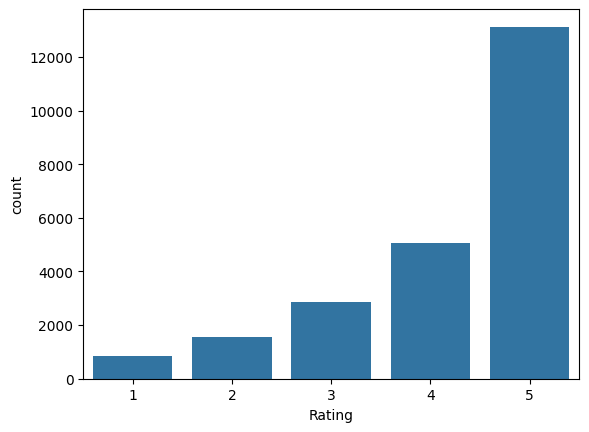

In [15]:
sns.countplot(x='Rating', data=df)

## **Data Preprocessing**
Define target (y) and Feature (X)

In [ ]:
df.columns

In [18]:
X = df['Review']

In [19]:
Y = df['Rating']

In [20]:
df['Rating'].value_counts()

,count
Rating,
5,13131
4,5077
3,2871
2,1565
1,842


## **Train Test Split**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, stratify=Y, random_state=2529)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16440,), (7046,), (16440,), (7046,))

## **Modeling**
Feature Extraction using Count Vectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer(lowercase=True, analyzer='word', ngram_range=(2,3), stop_words='english', max_features=5000)

In [26]:
X_train = cv.fit_transform(X_train)

In [27]:
cv.get_feature_names_out()

array(['10 12', '10 bought', '10 fit', ..., 'yellow color', 'yoga pants',
       'zipper little'], dtype=object)

In [28]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
X_test = cv.fit_transform(X_test)

In [30]:
cv.get_feature_names_out()

array(['10 12', '10 dress', '10 fit', ..., 'years come', 'years old',
       'yoga pants'], dtype=object)

In [31]:
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## **Multinomial Naive Bayes Model**

## **Get Model Train**


In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
model = MultinomialNB()

In [34]:
model.fit(X_train, y_train)

MultinomialNB()

## **Get Model Prediction**

In [35]:
Y_pred = model.predict(X_test)

In [36]:
Y_pred.shape

(7046,)

In [37]:
Y_pred

array([1, 5, 5, ..., 5, 5, 5])

## **Get Probability of Each Predicted Class**

In [38]:
model.predict_proba(X_test)

array([[0.71118473, 0.02625165, 0.15465118, 0.01496876, 0.09294369],
       [0.02416867, 0.04769471, 0.35268622, 0.16185007, 0.41360034],
       [0.03582725, 0.06660584, 0.12226277, 0.21618005, 0.55912409],
       ...,
       [0.02320281, 0.08950939, 0.08962183, 0.16719203, 0.63047394],
       [0.01167675, 0.00202714, 0.08539004, 0.34347398, 0.55743209],
       [0.03959824, 0.05612822, 0.00688869, 0.1560574 , 0.74132745]])

## **Model Evaluation**

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
print(confusion_matrix(y_test, Y_pred))

[[  15   13   45   36  144]
 [  43   43   86   85  213]
 [ 116   78  113  166  388]
 [ 166  108  194  336  719]
 [ 371  272  349  722 2225]]


In [41]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.02      0.06      0.03       253
           2       0.08      0.09      0.09       470
           3       0.14      0.13      0.14       861
           4       0.25      0.22      0.23      1523
           5       0.60      0.56      0.58      3939

    accuracy                           0.39      7046
   macro avg       0.22      0.21      0.21      7046
weighted avg       0.42      0.39      0.40      7046



## **Recategories Ratings as Poor (0) and Good (1)**

In [42]:
df['Rating'].value_counts()

,count
Rating,
5,13131
4,5077
3,2871
2,1565
1,842


In [43]:
df.replace({'Rating': {1:0, 2:0, 3:0, 4:1, 5:1}}, inplace=True)

In [44]:
Y = df['Rating']

In [45]:
X = df['Review']

## **Train Test Split**

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, stratify=Y, random_state=2529)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16440,), (7046,), (16440,), (7046,))

## **Feature Extraction and Model Training**

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
cv = CountVectorizer(lowercase=True, analyzer='word', ngram_range=(2,3), stop_words='english', max_features=5000)

In [51]:
X_train = cv.fit_transform(X_train)

In [52]:
X_test = cv.fit_transform(X_test)

## **Get Model Re-Train**

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
model = MultinomialNB()

In [55]:
model.fit(X_train, y_train)

MultinomialNB()

## **Model Prediction**

In [56]:
Y_pred = model.predict(X_test)

In [57]:
Y_pred.shape

(7046,)

In [58]:
Y_pred

array([1, 1, 1, ..., 1, 1, 1])

## **Model Evaluation**

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
print(confusion_matrix(y_test, Y_pred))

[[ 449 1134]
 [ 989 4474]]


In [61]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.31      0.28      0.30      1583
           1       0.80      0.82      0.81      5463

    accuracy                           0.70      7046
   macro avg       0.56      0.55      0.55      7046
weighted avg       0.69      0.70      0.69      7046



## **Explanation**
The project uses the Multinomial Naive Bayes algorithm to predict ratings based on text reviews.

**Text Data Preprocessing:** Reviews are vectorized into a bag-of-words representation with n-grams.

**Model Training:** Multinomial Naive Bayes is applied to train the model.

**Evaluation:** Confusion matrix and classification report evaluate performance.

**Binary Classification Extension:** Ratings are reduced to two categories to assess binary classification performance.